<a href="https://colab.research.google.com/github/Jeru-John/ML-case-studies/blob/main/TelecomCustomer_Churn_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing the needed libraries:**

In [ ]:
#Standard libraries for data analysis and data visualization:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt # helps in data visulatization plot
import seaborn as sns # Enhancing the visual aesthetics of plots

**reading a dataset:**

In [ ]:
dataframe = pd.read_csv('/content/TelcomCustomer-Churn.csv')
dataframe.head() # to get to know the data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# **Basic Prerequistes:**

**Evaluating data structures of the dataset:**

In [ ]:
#Evaluating data structures:
print(dataframe.shape); # gives (no_of_rows, no_of_cols)
print(dataframe.size); # gives total no of values
print(dataframe.describe()); # gives count,mean and some details only for numerical values
print(dataframe.dtypes); # gives the datatypes of all cols respectively and the whole datatype of dataset
print(dataframe.info()); # gives no_of_values, null value detail, datatype of all cols

(7043, 21)
147903
       SeniorCitizen       tenure  MonthlyCharges
count    7043.000000  7043.000000     7043.000000
mean        0.162147    32.371149       64.761692
std         0.368612    24.559481       30.090047
min         0.000000     0.000000       18.250000
25%         0.000000     9.000000       35.500000
50%         0.000000    29.000000       70.350000
75%         0.000000    55.000000       89.850000
max         1.000000    72.000000      118.750000
customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64


Insights from evaluating the datastructure:

*   it contains 7043 - rows and 21 - columns
*   total no of values = 147903
*   There are 3 numerical values and many categorical values.

TotalCharges is in object which should be a float or int











In [ ]:
# Checking Null Values
dataframe.isnull().any()

customerID          False
gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges        False
Churn               False
dtype: bool

# **Basic Data cleaning:**

In [ ]:
# make a new copy of the dataset:
Clean_data = dataframe.copy()

**Changing totalcharges which is in object to float or int based on the above insights:**

In [ ]:
# Convert 'TotalCharges' column to numeric, ignoring empty strings
Clean_data['TotalCharges'] = pd.to_numeric(Clean_data['TotalCharges'], errors='coerce')
#When errors is set to 'coerce', any non-numeric values will be converted to NaN (missing value).

In [ ]:
# Check for null values in TotalCharges - as it is converted into float.
missing_values = Clean_data['TotalCharges'].isnull()
missing_indices = Clean_data[missing_values].index
print(len(missing_indices));

11


There are 11 null values in the col TotalCharges

**Imputing: Filling the missing values in the column with mean**

In [ ]:
# Calculate the mean excluding missing values
mean_value = Clean_data['TotalCharges'].mean()

# Replace missing values with the mean value
Clean_data['TotalCharges'].fillna(mean_value, inplace=True)

# Check for empty values again
empty_values = Clean_data['TotalCharges'].isnull()
empty_string_indices = Clean_data[empty_values].index
print(empty_string_indices)
print(len(empty_string_indices))
print(Clean_data['TotalCharges'].dtypes)

Int64Index([], dtype='int64')
0
float64


In [ ]:
#Unique values in each categorical variable: (To get deeper understanding of the features)
#Looping through columns to get the unique values per feature/column.

for i in Clean_data.columns:
    print(f"Uniques {i}'s count:{Clean_data[i].nunique()}")
    print(f"{Clean_data[i].unique()}\n")

Uniques customerID's count:7043
['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']

Uniques gender's count:2
['Female' 'Male']

Uniques SeniorCitizen's count:2
[0 1]

Uniques Partner's count:2
['Yes' 'No']

Uniques Dependents's count:2
['No' 'Yes']

Uniques tenure's count:73
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]

Uniques PhoneService's count:2
['No' 'Yes']

Uniques MultipleLines's count:3
['No phone service' 'No' 'Yes']

Uniques InternetService's count:3
['DSL' 'Fiber optic' 'No']

Uniques OnlineSecurity's count:3
['No' 'Yes' 'No internet service']

Uniques OnlineBackup's count:3
['Yes' 'No' 'No internet service']

Uniques DeviceProtection's count:3
['No' 'Yes' 'No internet service']

Uniques TechSupport's count:3
['No' 'Yes' 'No internet service']

Uniques StreamingTV'

**Insights from the above result:**

Continuous Variables:

1. Tenure
2. MonthlyCharges
3. TotalCharges

Categorical Variables:

CustomerID, Partner, Dependents, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod, Churn

***Target Variable: Churn (categorical variable)***

# **Check target variable distribution:**

In [ ]:
print(Clean_data['Churn'].value_counts()) # returns the count of each categorical value.

No     5174
Yes    1869
Name: Churn, dtype: int64


Figure(1500x500)
2


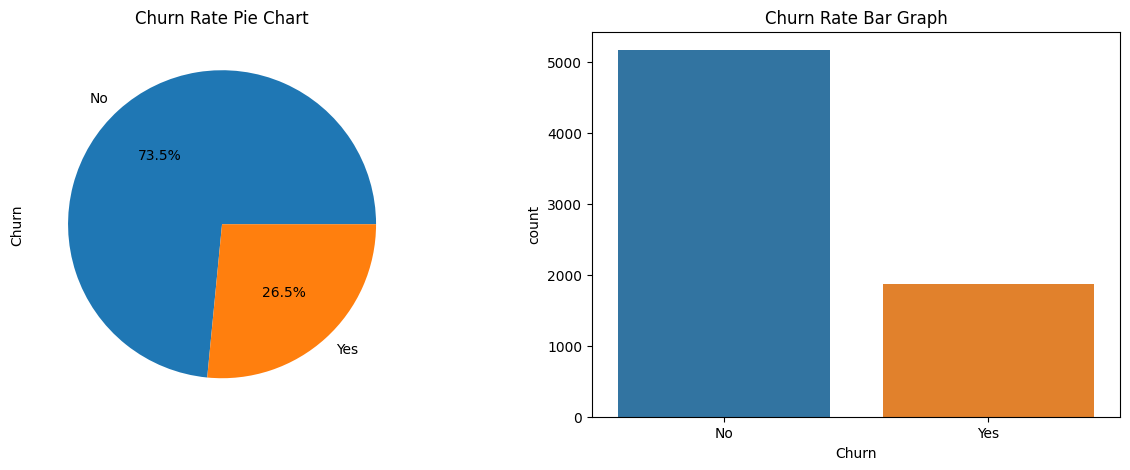

In [ ]:
f,axes=plt.subplots(1,2,figsize=(15,5)) # plot in 1 row with 2 column
print(f) # figure plotted figure Figure(1500x500)
print(len(axes))
Clean_data['Churn'].value_counts().plot.pie(autopct='%1.1f%%',ax=axes[0]) # pie-chart plot in 0th axes ie 1st col
# autopct='%1.1f%%' argument formats the pie chart to display the percentage values as labels on each slice.
sns.countplot(x='Churn', data=Clean_data, ax=axes[1]) # bar-chart plot in 1th axes ie 2nd col
axes[0].set_title('Churn Rate Pie Chart')
axes[1].set_title('Churn Rate Bar Graph')
plt.show()

Insight: Data set is implanced with high proportion of no value.

# **Data visualization for better understanding: Using different plots**

<Figure size 1200x600 with 0 Axes>

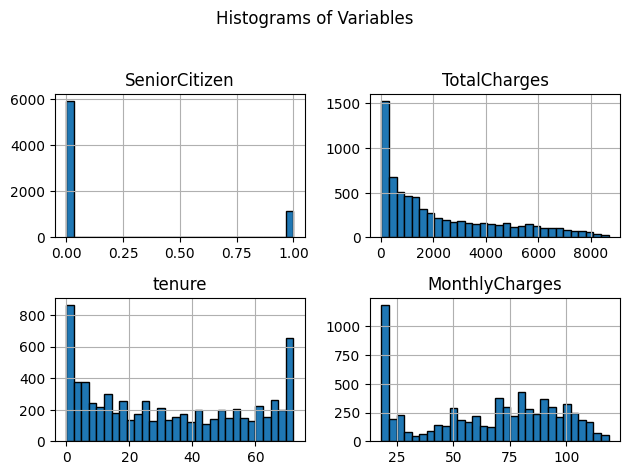

In [ ]:
# Clean_data.boxplot(figsize=(20,5))
# plt.figure(figsize=(12, 6))

#violinplot
# sns.violinplot(data=Clean_data[['SeniorCitizen', 'TotalCharges', 'tenure', 'MonthlyCharges']], orient='v')
# plt.title('Distribution of Variables')
# plt.xlabel('Variables')
# plt.ylabel('Values')
# plt.xticks(rotation=45)
# plt.show()

#Histogram
plt.figure(figsize=(12, 6))
Clean_data[['SeniorCitizen', 'TotalCharges', 'tenure', 'MonthlyCharges']].hist(layout=(2, 2), bins=30, edgecolor='black')
plt.suptitle('Histograms of Variables')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

Insights: TotalCharges and MonthlyCharges are left-skewed.

**Univariate Analysis:**
Distribution and outlier analysis of numerical variables:

There are 3 such variables: TotalCharges, tenure and MonthlyCharges


<ipython-input-142-d2d0092db21b>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Clean_data[cols],  ax=axes[0], color='red') #distribution plot


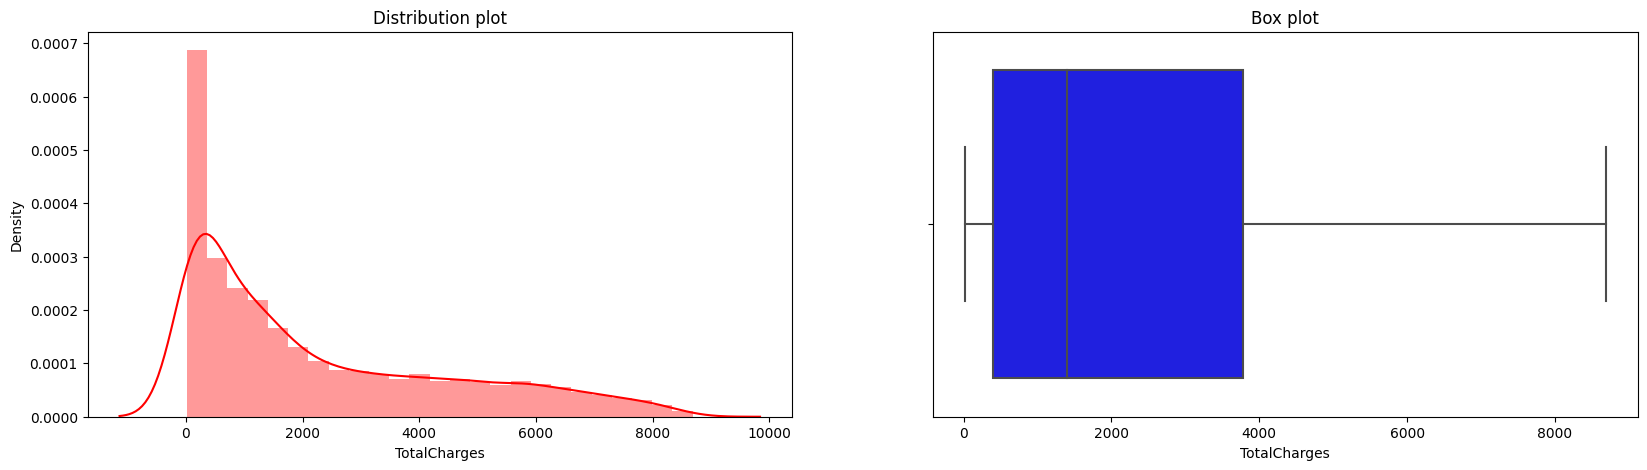

 Total Number of outliers in TotalCharges: 0


<ipython-input-142-d2d0092db21b>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Clean_data[cols],  ax=axes[0], color='red') #distribution plot


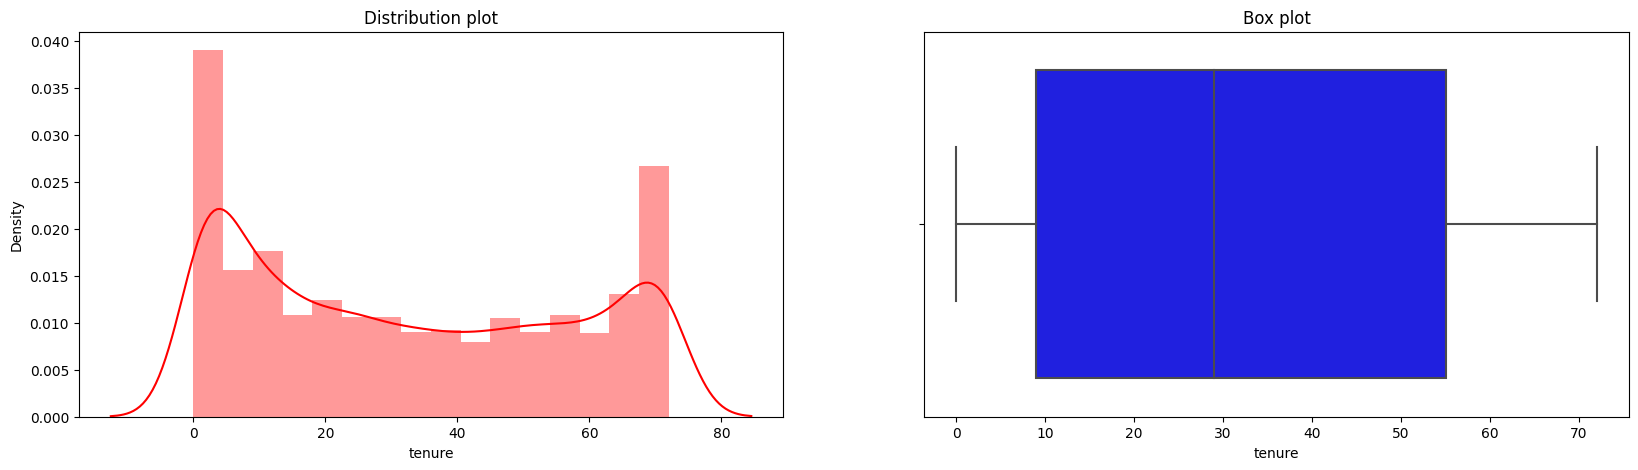

 Total Number of outliers in tenure: 0


<ipython-input-142-d2d0092db21b>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Clean_data[cols],  ax=axes[0], color='red') #distribution plot


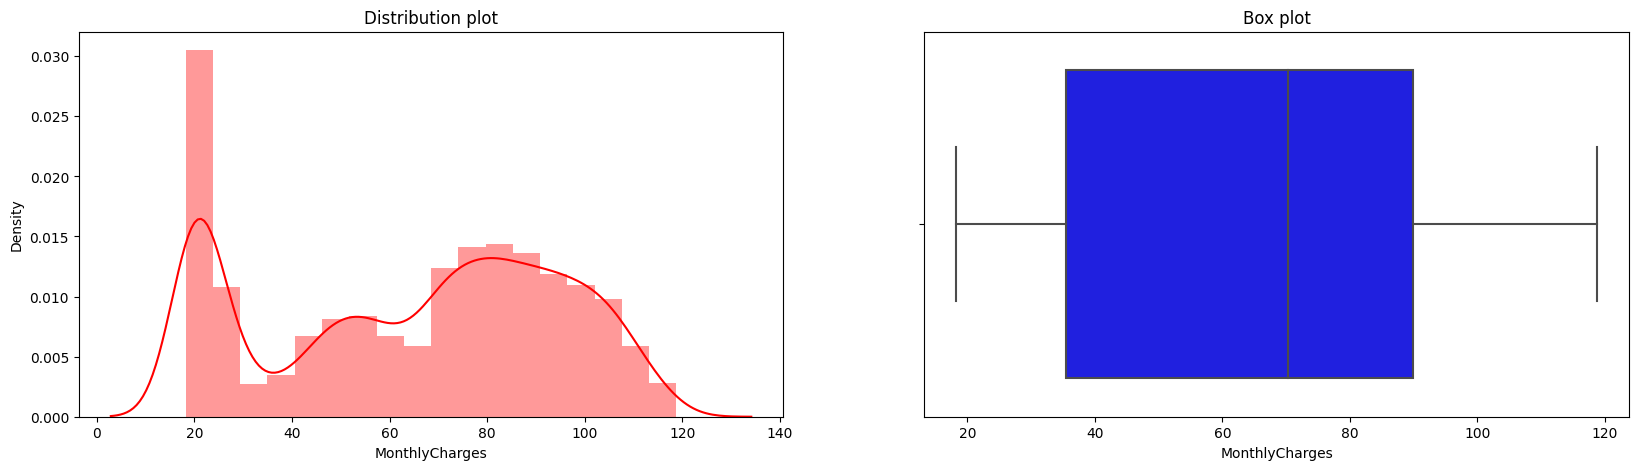

 Total Number of outliers in MonthlyCharges: 0


In [ ]:
numerical_variables = ['TotalCharges', 'tenure', 'MonthlyCharges']

for cols in numerical_variables:
  f, axes = plt.subplots(1, 2, figsize=(20,5))
  sns.boxplot(x = cols, data=Clean_data,  orient='h' , ax=axes[1], color='blue') #boxplot
  sns.distplot(Clean_data[cols],  ax=axes[0], color='red') #distribution plot
  axes[0].set_title('Distribution plot')
  axes[1].set_title('Box plot')
  plt.show()

  #checking count of outliers.

  q25,q75 = np.percentile(Clean_data[cols],25),np.percentile(Clean_data[cols],75)
  # calculating percentile using numpy package for 25% and 75%
  IQR = q75-q25 # => caluculating IQR by minusing : 75% - 25%
  Threshold = IQR*1.5 # doubt: why 1.5?
  lower,upper = q25 - Threshold, q75 + Threshold #getting the lower and upper threshold values by adding and subtracting threshold
  Outliers = [i for i in Clean_data[cols] if i < lower or i > upper]
  # will give the data more than upper value and less than lower value (ie. outliers)
  print('{} Total Number of outliers in {}: {}'.format('\033[1m', cols, len(Outliers)))



**Bivariate analysis:**
1. Target variable (Churn) Vs numerical_variables array

Here's a visual representation of the grid created by plt.subplots(rows, cols) with rows = 2 and cols = 3:


```
+---+---+---+
|   |   |   |
+---+---+---+
|   |   |   |
+---+---+---+
```


Each empty cell represents a subplot, and axes is an array that stores references to each subplot. You can access each subplot using indexing, such as axes[0, 0] for the top-left subplot, axes[0, 1] for the top-center subplot, and so on.

In [ ]:
import math

plots = {1: 111, 2: 121, 3: 131, 4: 221, 5: 231, 6: 231}

def boxplot(x, y, data): # x- target varaible, y- numerical variable array, dataset
    num_plots = len(y)
    # for maintaining a balanced arrangement in plot
    # rows = math.ceil(math.sqrt(num_plots)) #ceil - rounds to the higher integer
    # cols = math.ceil(num_plots / rows)
    rows = 1
    cols = num_plots
    fig, axes = plt.subplots(rows, cols, figsize=(3*cols, 3*rows))

    #enumerate(axes.flat) creates an iterator that combines the index i and the corresponding subplot ax from the flattened axes array.
    for i, ax in enumerate(axes.flat):
        if i < num_plots:
            ax = sns.boxplot(x=x, y=y[i], data=data, palette="BuGn", linewidth=1, ax=ax)
            # can be sns.color_palette("deep") - to give custom colors
            ax.set_title(y[i])
        else:
            ax.axis('off')

    plt.tight_layout() # to improve spacing
    plt.show()


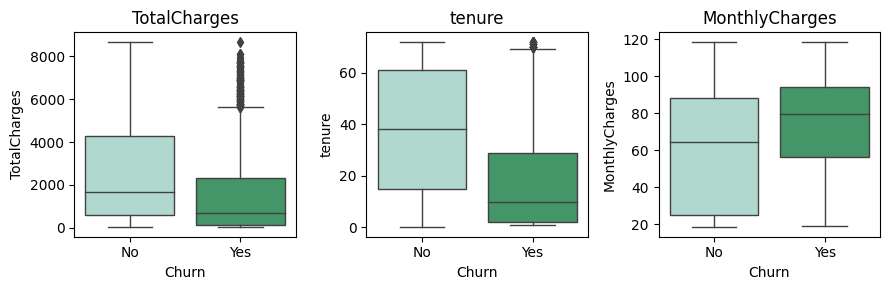

In [ ]:
boxplot ( 'Churn' , numerical_variables, Clean_data)

Insights:
1.   Less than 2500 USD increases the churning rate
2.   Less than 30 tenure years increases the churning rate
3.   Between 55 to 95 monthlyCharges, there is a high chance of churning.

These insights suggest that lower total charges, shorter tenure, and certain ranges of monthly charges are associated with a higher likelihood of customers churning, or in other words, discontinuing their services.

2. Target varaible (Churn) vs categorical values

In [ ]:
# Create function to generate Count Plot
def countplot(x, y, data):
    num_plots = len(y)
    rows = math.ceil(num_plots / 3)
    cols = 3
    figsize = (7 * cols, 7 * rows)
    fig, axes = plt.subplots(rows, cols, figsize=figsize)
    axes = axes.flatten()

    for i, j in enumerate(y):
        if i < num_plots:
            ax = axes[i]
            sns.countplot(x=j, hue=x, data=data, palette='Reds', alpha=0.8, linewidth=1, edgecolor='black', ax=ax)
            ax.set_title(j)
            ax.legend(title=x)
        else:
            fig.delaxes(axes[i])  # Remove empty subplot

    plt.tight_layout()
    plt.show()


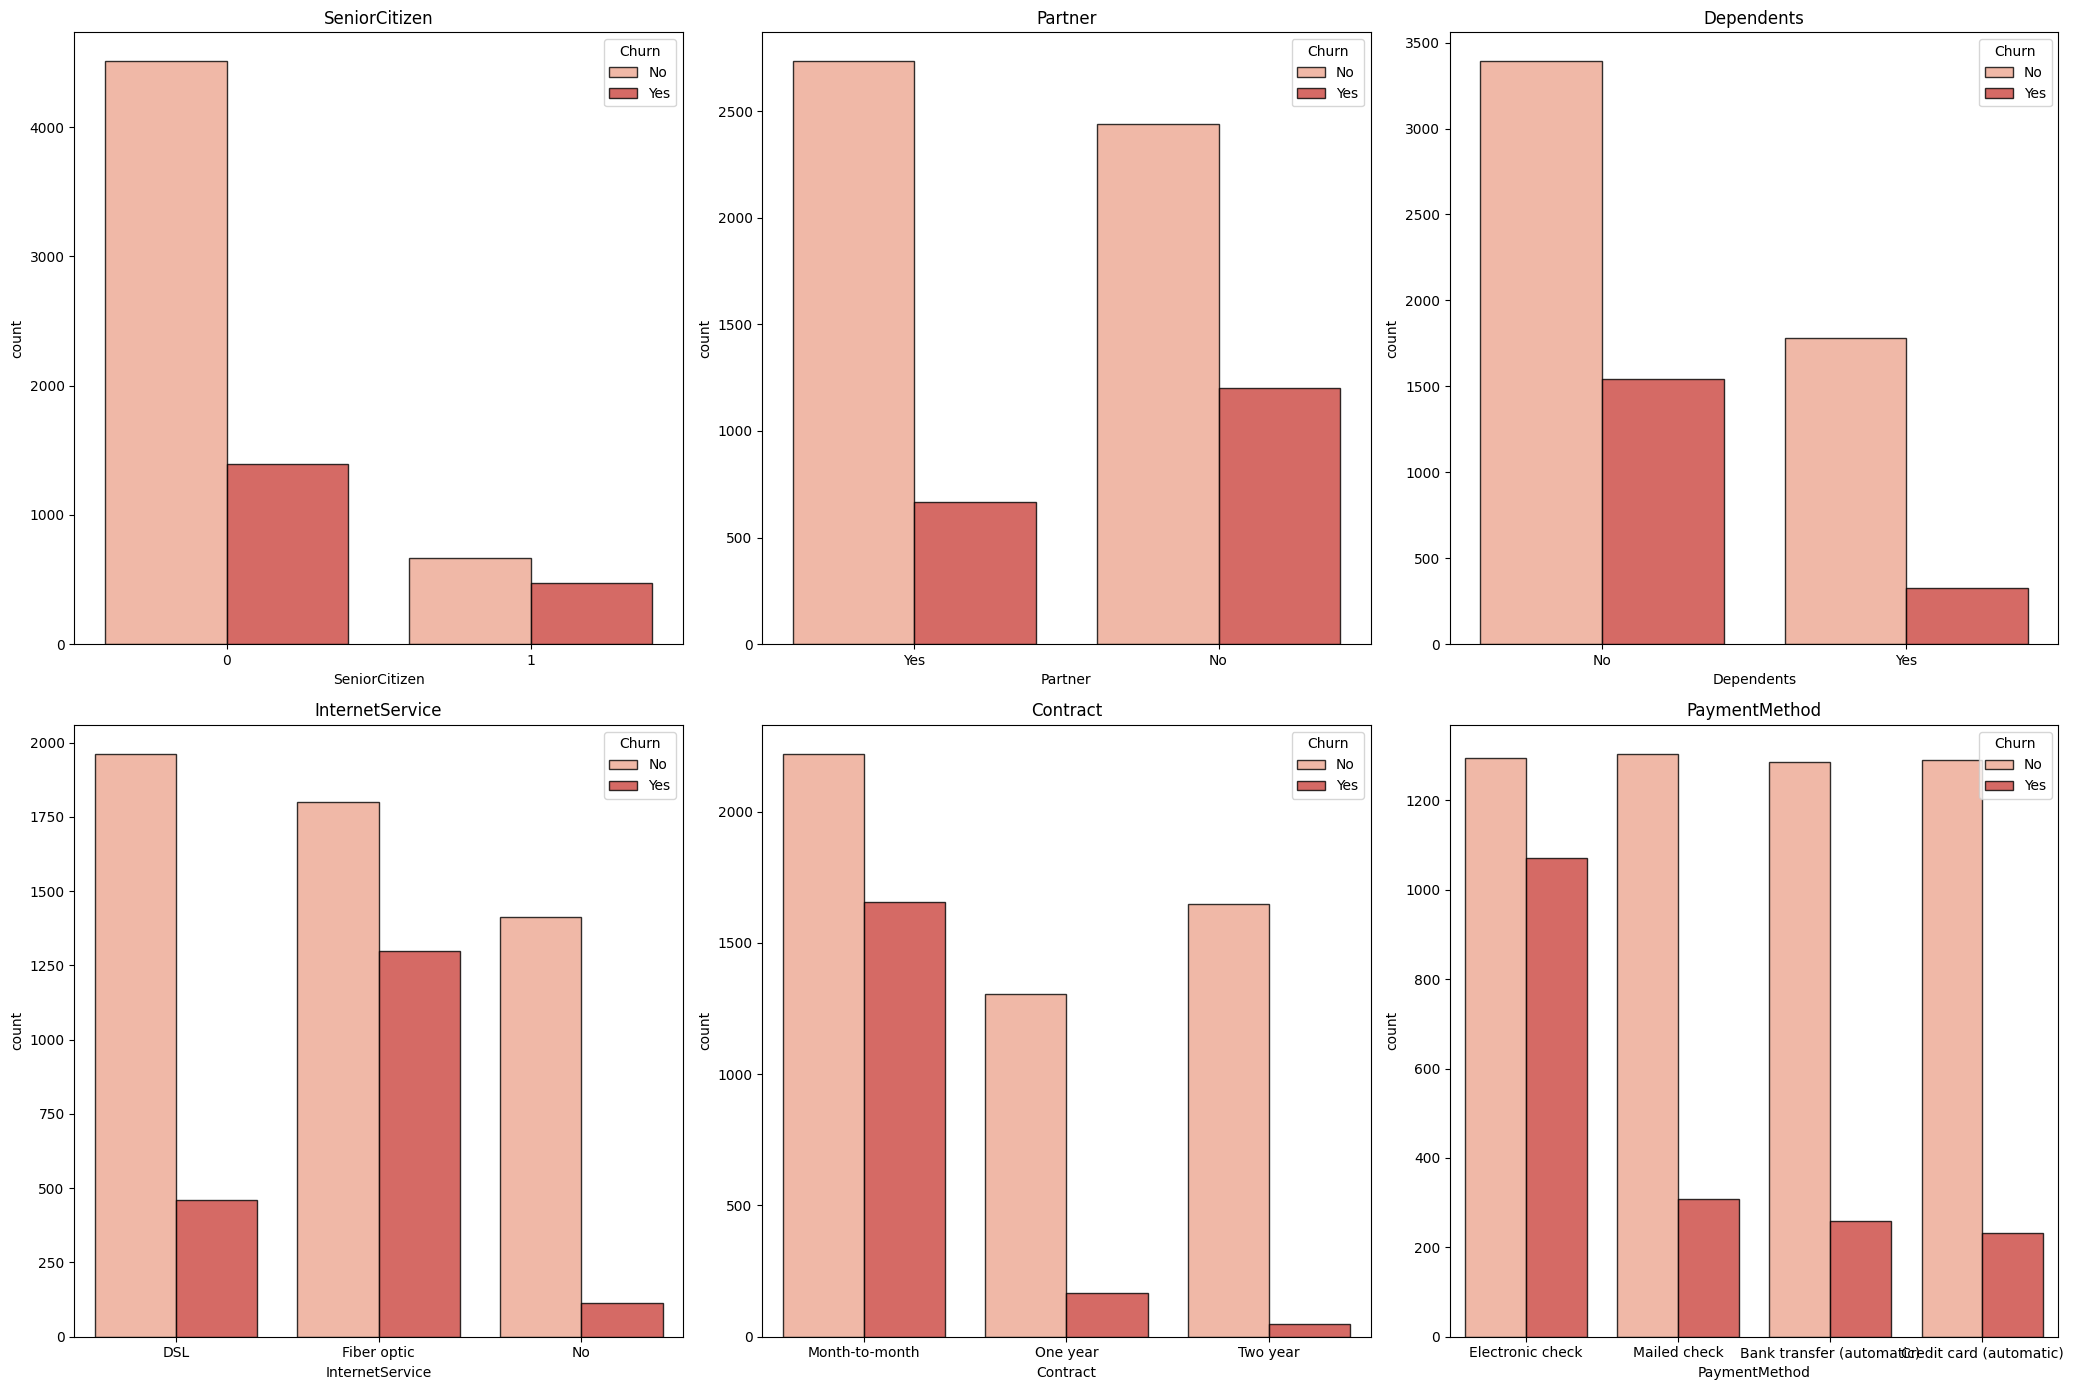

In [ ]:
# categorical_variables = list(set(Clean_data.columns) - set(numerical_variables))
categorical_variables = ['SeniorCitizen', 'Partner', 'Dependents', 'InternetService', 'Contract', 'PaymentMethod']
countplot ('Churn' , categorical_variables, Clean_data)

Insights:

1.   SeniorCitizens have higher churning rate compared to non-seniorCitizens
2.   Non-partners have higher churning rate compared to partners
3.   Dependents have lesser churning rate compared to non-dependents
4.   Fiber-optic InternetService seems to have higher churning rate.
5.   Month-to-month contract customers has higher churning rate.
6.   Electronic Check PaymentMethod seems to have higher churning rate compared to other payment methods.



**3. Multivariate Analysis:**

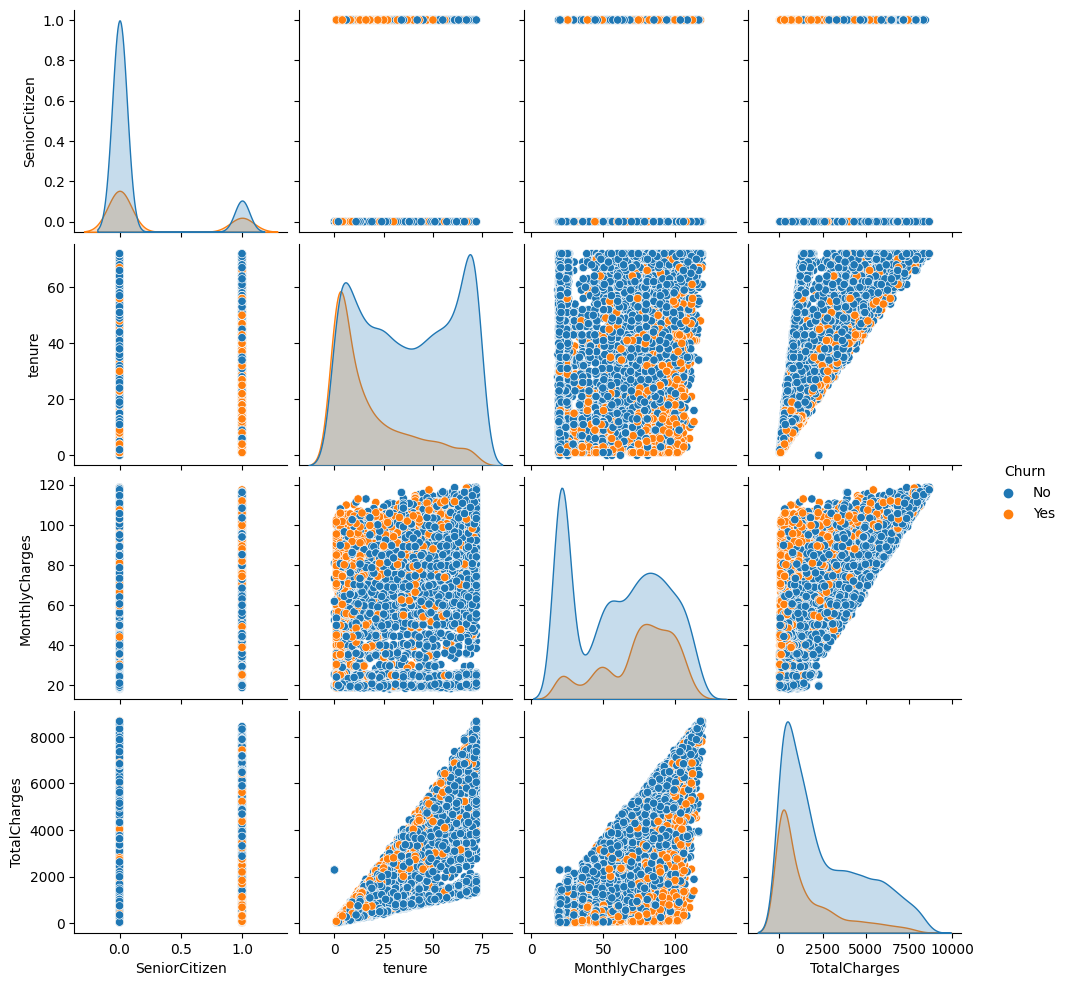

In [ ]:
# sns.pairplot(Clean_data);
sns.pairplot(Clean_data,hue='Churn');
#hue - to know the relationships between the numerical variables differ based on the target variable's categories
plt.show()

Correlation matrix:

<ipython-input-148-17a910e280df>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  mask = np.triu(np.ones_like(Clean_data.corr()))
<ipython-input-148-17a910e280df>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(Clean_data.corr(),mask = mask, fmt = ".2f",annot=True,lw=1,cmap = 'plasma',vmax=1, center=0,square=True, linewidths=1)


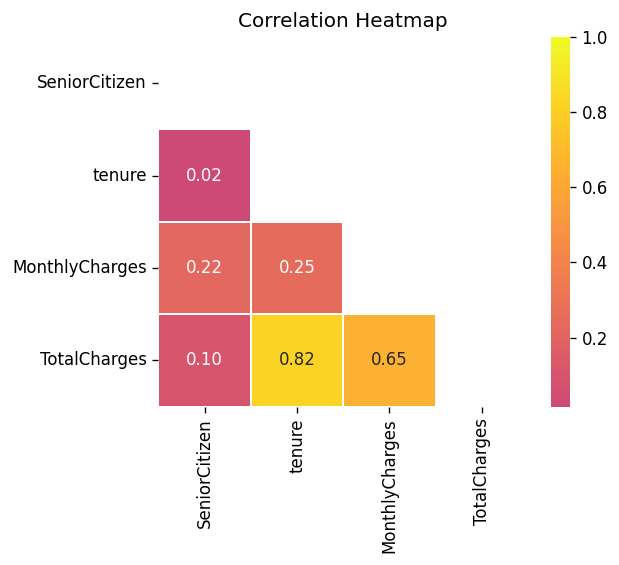

In [ ]:
#Correlation matrix helps us to discover the bivariate relationship between independent variables in a dataset.

plt.figure(dpi = 120,figsize= (5,4))
mask = np.triu(np.ones_like(Clean_data.corr()))
sns.heatmap(Clean_data.corr(),mask = mask, fmt = ".2f",annot=True,lw=1,cmap = 'plasma',vmax=1, center=0,square=True, linewidths=1)
plt.yticks(rotation = 0)
plt.xticks(rotation = 90)
plt.title('Correlation Heatmap')
plt.show()

# **Data Preprocessing:**

In [ ]:
#Target column
target_col = ["Churn"]

#categorical columns
cat_cols   = Clean_data.nunique()[Clean_data.nunique() < 10].keys().tolist()
cat_cols   = [x for x in cat_cols if x not in target_col]
column_indexes = [Clean_data.columns.get_loc(col) for col in cat_cols]
print(column_indexes)
print(cat_cols);

#numerical columns
num_cols   = [x for x in Clean_data.columns if x not in cat_cols + target_col]
print(num_cols);

#Binary columns with 2 values
bin_cols   = Clean_data.nunique()[Clean_data.nunique() == 2].keys().tolist()
print(bin_cols);

#Columns more than 2 values
multi_cols = [i for i in cat_cols if i not in bin_cols]
print(multi_cols)

[1, 2, 3, 4, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]
['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']
['customerID', 'tenure', 'MonthlyCharges', 'TotalCharges']
['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']
['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod']


In [ ]:
print(Clean_data.columns)

# Remove Identifiers: Separate ‘customerID’ from training and test data frames.
identity = Clean_data["customerID"]
Clean_data = Clean_data.drop(columns="customerID")
Clean_data.drop(['customerID'],axis=1,inplace=True)
print(Clean_data.columns)

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')
Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')


Label Encoding Binary Columns:

In [ ]:
yes_no_columns = []  # Array to store the column indices with categorical values

for column in Clean_data:
    if Clean_data[column].dtype == object:  # Check if column is of object/string type
        unique_values = Clean_data[column].astype(str).str.strip().unique()
        if len(unique_values) > 1:
           yes_no_columns.append(Clean_data.columns.get_loc(column))

print(yes_no_columns)

[0, 2, 3, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 19]


In [ ]:
from sklearn.preprocessing import LabelEncoder

#converting all categorical values into numerical values
new_data = Clean_data.copy()

label_encoder = LabelEncoder()

for column_idx in yes_no_columns:
    column_name = new_data.columns[column_idx]
    new_data[column_name] = label_encoder.fit_transform(new_data[column_name])

print(new_data)

      gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0          0              0        1           0       1             0   
1          1              0        0           0      34             1   
2          1              0        0           0       2             1   
3          1              0        0           0      45             0   
4          0              0        0           0       2             1   
...      ...            ...      ...         ...     ...           ...   
7038       1              0        1           1      24             1   
7039       0              0        1           1      72             1   
7040       0              0        1           1      11             0   
7041       1              1        1           0       4             1   
7042       1              0        0           0      66             1   

      MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
0                 1                0     

**To drop irrelavant cols based on correlation:**
1. check for correlation of cols
2. using correlation matrix and p_values find out the correlation threshold based on significance level.

In [ ]:
from scipy.stats import pearsonr

# Calculate correlation coefficients and p-values
correlation_matrix = new_data.corr()
p_values = np.zeros_like(correlation_matrix.values)

for i in range(len(correlation_matrix.columns)):
    for j in range(len(correlation_matrix.columns)):
        if i != j:
            corr, p_value = pearsonr(new_data.iloc[:, i], new_data.iloc[:, j])
            correlation_matrix.values[i, j] = corr
            p_values[i, j] = p_value

# Set the desired significance level
significance_level = 0.05

# Find the correlation threshold based on significance level
threshold = np.min(np.abs(correlation_matrix.values[p_values < significance_level]))

# Print the correlation threshold
print(f"Correlation threshold based on significance level ({significance_level}): {threshold}")

Correlation threshold based on significance level (0.05): 0.02410479126976977


In [ ]:
# Compute the correlation matrix
correlation_matrix = new_data.corr()

# Identify columns with low correlation with the target variable
threshold = 0.0241  # Set a correlation threshold below which columns are considered to have low correlation
irrelevant_columns = correlation_matrix[abs(correlation_matrix['Churn']) < threshold].index.tolist()

# Print the irrelevant columns
print(irrelevant_columns)

['gender', 'PhoneService']


**drop the irrelevant columns:**

In [ ]:
# Dropping the irrelevant columns
significant_data = new_data.drop(columns=irrelevant_columns)

# Print the modified DataFrame
print(significant_data.columns)

Index(['SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges',
       'Churn'],
      dtype='object')


**drop target variable:**

In [ ]:
#Identify response variable:

response = significant_data["Churn"]
Main_data = significant_data.drop(columns="Churn")

# data preprocessed dataset with target value
print(significant_data)

# data preprocessed dataset without target value
print(Main_data)

      SeniorCitizen  Partner  Dependents  tenure  MultipleLines  \
0                 0        1           0       1              1   
1                 0        0           0      34              0   
2                 0        0           0       2              0   
3                 0        0           0      45              1   
4                 0        0           0       2              0   
...             ...      ...         ...     ...            ...   
7038              0        1           1      24              2   
7039              0        1           1      72              2   
7040              0        1           1      11              1   
7041              1        1           0       4              2   
7042              0        0           0      66              0   

      InternetService  OnlineSecurity  OnlineBackup  DeviceProtection  \
0                   0               0             2                 0   
1                   0               2            

# **Splitting test and train data:**

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(Main_data, response,stratify=response, test_size = 0.2)
#to resolve any class imbalance - use stratify parameter.
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (5634, 17)
Number transactions y_train dataset:  (5634,)
Number transactions X_test dataset:  (1409, 17)
Number transactions y_test dataset:  (1409,)


# **Scaling:**

In [ ]:
#Feature Scaling:
from sklearn.preprocessing import StandardScaler

sc_X = StandardScaler()
X_train2 = pd.DataFrame(sc_X.fit_transform(X_train))
X_train2.columns = X_train.columns.values
X_train2.index = X_train.index.values
X_train = X_train2
X_test2 = pd.DataFrame(sc_X.transform(X_test))
X_test2.columns = X_test.columns.values
X_test2.index = X_test.index.values
X_test = X_test2


print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (5634, 17)
Number transactions y_train dataset:  (5634,)
Number transactions X_test dataset:  (1409, 17)
Number transactions y_test dataset:  (1409,)


# **Model Selection:**

In [ ]:
#sklearn modules for Model Selection:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
# from sklearn import feature_selection
from sklearn import model_selection
# from sklearn import metrics
from sklearn.model_selection import KFold

In [ ]:
models = []
models.append(('Logistic Regression', LogisticRegression(solver='liblinear', random_state = 0, class_weight='balanced')))
models.append(('SVC', SVC(kernel = 'linear', random_state = 0)))
models.append(('Kernel SVM', SVC(kernel = 'rbf', random_state = 0)))
models.append(('KNN', KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)))
models.append(('Gaussian NB', GaussianNB()))
models.append(('Decision Tree Classifier',DecisionTreeClassifier(criterion = 'entropy', random_state = 0)))
models.append(('Random Forest', RandomForestClassifier(n_estimators=100, criterion = 'entropy', random_state = 0)))
#Evaluating Model Results:
acc_results = []
auc_results = []
names = []
# set table to table to populate with performance results
col = ['Algorithm', 'ROC AUC Mean', 'ROC AUC STD',
       'Accuracy Mean', 'Accuracy STD']
model_results = pd.DataFrame(columns=col)
i = 0
# Evaluate each model using k-fold cross-validation:
for name, model in models:
    kfold = model_selection.KFold(n_splits=10)
# accuracy scoring:
    cv_acc_results = model_selection.cross_val_score(
    model, X_train, y_train, cv=kfold, scoring='accuracy')
    # roc_auc scoring:
    cv_auc_results = model_selection.cross_val_score(
    model, X_train, y_train, cv=kfold, scoring='roc_auc')
    acc_results.append(cv_acc_results)
    auc_results.append(cv_auc_results)
    names.append(name)
    model_results.loc[i] = [name,
                            round(cv_auc_results.mean()*100, 2),
                            round(cv_auc_results.std()*100, 2),
                            round(cv_acc_results.mean()*100, 2),
                            round(cv_acc_results.std()*100, 2)
                            ]
    i += 1

model_results.sort_values(by=['ROC AUC Mean'], ascending=False)

,Algorithm,ROC AUC Mean,ROC AUC STD,Accuracy Mean,Accuracy STD
0,Logistic Regression,83.96,1.34,73.78,0.88
1,SVC,82.52,1.65,79.46,1.83
4,Gaussian NB,82.24,1.15,75.17,1.39
6,Random Forest,81.92,1.91,78.54,1.50
2,Kernel SVM,78.84,2.39,79.27,1.83
3,KNN,76.90,2.53,75.27,1.45
5,Decision Tree Classifier,65.84,1.43,72.86,1.54


**Get the right parameters for the baseline models:**

1. Identify the optimal number of K neighbors for KNN Model:



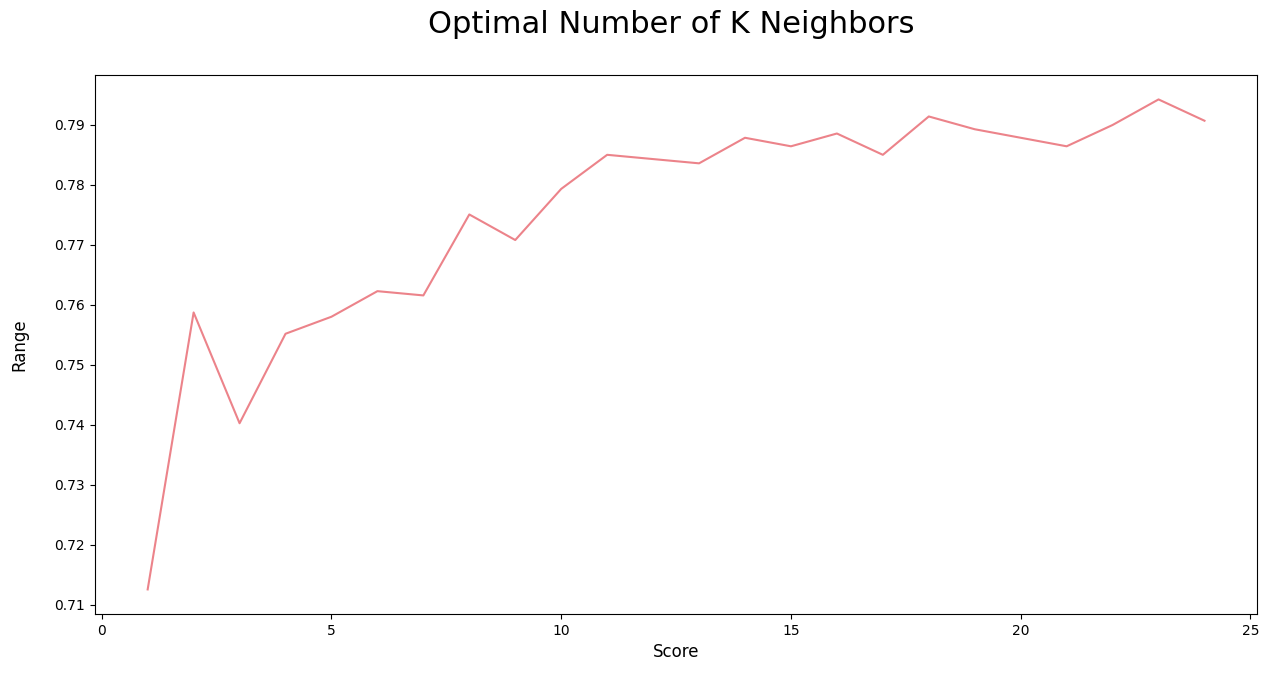

In [ ]:
score_array = []
for each in range(1,25):
    knn_loop = KNeighborsClassifier(n_neighbors = each)
#set K neighbor as 3
    knn_loop.fit(X_train,y_train)
    score_array.append(knn_loop.score(X_test,y_test))
fig = plt.figure(figsize=(15, 7))
plt.plot(range(1,25),score_array, color = '#ec838a')
plt.ylabel('Range\n',horizontalalignment="center",
fontstyle = "normal", fontsize = "large",
fontfamily = "sans-serif")
plt.xlabel('Score\n',horizontalalignment="center",
fontstyle = "normal", fontsize = "large",
fontfamily = "sans-serif")
plt.title('Optimal Number of K Neighbors \n',
horizontalalignment="center", fontstyle = "normal",
 fontsize = "22", fontfamily = "sans-serif")
#plt.legend(loc='top right', fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")
plt.show()

We can use k=25 from the above insight.

2. Identify the optimal number of trees for Random Forest Model:

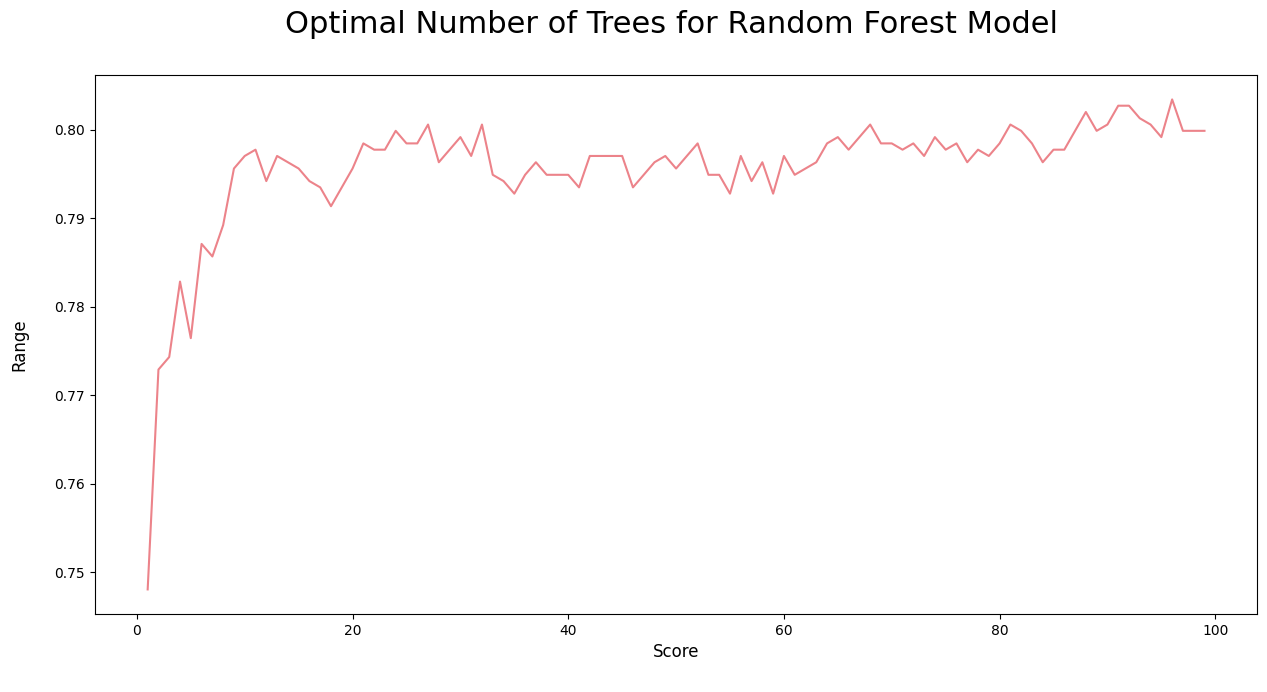

In [ ]:
score_array = []
for each in range(1,100):
    rf_loop = RandomForestClassifier(
n_estimators = each, random_state = 1)
    rf_loop.fit(X_train,y_train)
    score_array.append(rf_loop.score(X_test,y_test))

fig = plt.figure(figsize=(15, 7))
plt.plot(range(1,100),score_array, color = '#ec838a')
plt.ylabel('Range\n',horizontalalignment="center",
fontstyle = "normal", fontsize = "large",
fontfamily = "sans-serif")
plt.xlabel('Score\n',horizontalalignment="center",
fontstyle = "normal", fontsize = "large",
fontfamily = "sans-serif")
plt.title('Optimal Number of Trees for Random Forest Model \n',horizontalalignment="center", fontstyle = "normal", fontsize = "22", fontfamily = "sans-serif")
#plt.legend(loc='top right', fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")
plt.show()

n_estimators = 97 from the above insight

# **Model 2nd Iteration:**

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score,log_loss, classification_report, fbeta_score

Logistic Regression:

In [ ]:
# Fitting Logistic Regression to the Training set
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)
# Predicting the Test set results
y_pred = classifier.predict(X_test)
#Evaluate results
acc = accuracy_score(y_test, y_pred )
prec = precision_score(y_test, y_pred )
rec = recall_score(y_test, y_pred )
f1 = f1_score(y_test, y_pred )
f2 = fbeta_score(y_test, y_pred, beta=2.0)
results = pd.DataFrame([['Logistic Regression',
acc, prec, rec, f1, f2]], columns = ['Model',
'Accuracy', 'Precision', 'Recall', 'F1 Score',
'F2 Score'])
results = results.sort_values(["Precision",
"Recall", "F2 Score"], ascending = False)
print (results)

                 Model  Accuracy  Precision    Recall  F1 Score  F2 Score
0  Logistic Regression  0.809794   0.685315  0.524064  0.593939  0.549944


Support Vector Machine (linear classifier):

In [ ]:
# Fitting SVM (SVC class) to the Training set
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)
# Predicting the Test set results y_pred = classifier.predict(X_test)
#Evaluate results
acc = accuracy_score(y_test, y_pred )
prec = precision_score(y_test, y_pred )
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred )
f2 = fbeta_score(y_test, y_pred, beta=2.0)
model_results = pd.DataFrame(
[['SVM (Linear)', acc, prec, rec, f1, f2]],
columns = ['Model', 'Accuracy', 'Precision',
'Recall', 'F1 Score', 'F2 Score'])
results = results.append(model_results, ignore_index = True)
results = results.sort_values(["Precision",
"Recall", "F2 Score"], ascending = False)
print (results)

                 Model  Accuracy  Precision    Recall  F1 Score  F2 Score
0  Logistic Regression  0.809794   0.685315  0.524064  0.593939  0.549944
1         SVM (Linear)  0.809794   0.685315  0.524064  0.593939  0.549944


<ipython-input-177-f152e580f33a>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(model_results, ignore_index = True)


Kernel SVM:

In [ ]:
# Fitting KNN to the Training set:
classifier = KNeighborsClassifier(
n_neighbors = 25,
metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)
# Predicting the Test set results
y_pred  = classifier.predict(X_test)
#Evaluate results
acc = accuracy_score(y_test, y_pred )
prec = precision_score(y_test, y_pred )
rec = recall_score(y_test, y_pred )
f1 = f1_score(y_test, y_pred )
f2 = fbeta_score(y_test, y_pred, beta=2.0)
model_results = pd.DataFrame([['K-Nearest Neighbours',
acc, prec, rec, f1, f2]], columns = ['Model',
 'Accuracy', 'Precision', 'Recall',
 'F1 Score', 'F2 Score'])
results = results.append(model_results, ignore_index = True)
results = results.sort_values(["Precision",
"Recall", "F2 Score"], ascending = False)
print (results)

                  Model  Accuracy  Precision    Recall  F1 Score  F2 Score
0   Logistic Regression  0.809794   0.685315  0.524064  0.593939  0.549944
1          SVM (Linear)  0.809794   0.685315  0.524064  0.593939  0.549944
2  K-Nearest Neighbours  0.789212   0.622222  0.524064  0.568940  0.541137


<ipython-input-178-bfad8fee8fee>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(model_results, ignore_index = True)


Naive Bayes:

In [ ]:
# Fitting Naive Byes to the Training set:
classifier = GaussianNB()
classifier.fit(X_train, y_train)
# Predicting the Test set results
y_pred = classifier.predict(X_test)
#Evaluate results
acc = accuracy_score(y_test, y_pred )
prec = precision_score(y_test, y_pred )
rec = recall_score(y_test, y_pred )
f1 = f1_score(y_test, y_pred )
f2 = fbeta_score(y_test, y_pred, beta=2.0)
model_results = pd.DataFrame([[
'Naive Byes', acc, prec, rec, f1, f2]],
columns = ['Model', 'Accuracy', 'Precision',
'Recall', 'F1 Score', 'F2 Score'])
results = results.append(model_results, ignore_index = True)
results = results.sort_values(["Precision",
"Recall", "F2 Score"], ascending = False)
print (results)

                  Model  Accuracy  Precision    Recall  F1 Score  F2 Score
0   Logistic Regression  0.809794   0.685315  0.524064  0.593939  0.549944
1          SVM (Linear)  0.809794   0.685315  0.524064  0.593939  0.549944
2  K-Nearest Neighbours  0.789212   0.622222  0.524064  0.568940  0.541137
3            Naive Byes  0.755855   0.528846  0.735294  0.615213  0.682044


<ipython-input-179-26850b33068c>:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(model_results, ignore_index = True)


Decision Tree:

In [ ]:
# Fitting Decision Tree to the Training set:
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)
# Predicting the Test set results
y_pred = classifier.predict(X_test)
#Evaluate results
acc = accuracy_score(y_test, y_pred )
prec = precision_score(y_test, y_pred )
rec = recall_score(y_test, y_pred )
f1 = f1_score(y_test, y_pred )
f2 = fbeta_score(y_test, y_pred, beta=2.0)
model_results = pd.DataFrame([[
'Decision Tree', acc, prec, rec, f1, f2]],
 columns = ['Model', 'Accuracy', 'Precision',
'Recall', 'F1 Score', 'F2 Score'])
results = results.append(model_results, ignore_index = True)
results = results.sort_values(["Precision",
"Recall", "F2 Score"], ascending = False)
print (results)

                  Model  Accuracy  Precision    Recall  F1 Score  F2 Score
0   Logistic Regression  0.809794   0.685315  0.524064  0.593939  0.549944
1          SVM (Linear)  0.809794   0.685315  0.524064  0.593939  0.549944
2  K-Nearest Neighbours  0.789212   0.622222  0.524064  0.568940  0.541137
3            Naive Byes  0.755855   0.528846  0.735294  0.615213  0.682044
4         Decision Tree  0.742370   0.514360  0.526738  0.520476  0.524215


<ipython-input-180-37c263b0ff46>:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(model_results, ignore_index = True)


Random Forest:

In [ ]:
#Fitting Random Forest to the Training set:

classifier = RandomForestClassifier(n_estimators = 97,
criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)
# Predicting the Test set results
y_pred = classifier.predict(X_test)
#Evaluate results
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
acc = accuracy_score(y_test, y_pred )
prec = precision_score(y_test, y_pred )
rec = recall_score(y_test, y_pred )
f1 = f1_score(y_test, y_pred )
f2 = fbeta_score(y_test, y_pred, beta=2.0)
model_results = pd.DataFrame([['Random Forest',
acc, prec, rec, f1, f2]],
columns = ['Model', 'Accuracy', 'Precision',
'Recall', 'F1 Score', 'F2 Score'])
results = results.append(model_results, ignore_index = True)
results = results.sort_values(["Precision",
"Recall", "F2 Score"], ascending = False)
print (results)

                  Model  Accuracy  Precision    Recall  F1 Score  F2 Score
0   Logistic Regression  0.809794   0.685315  0.524064  0.593939  0.549944
1          SVM (Linear)  0.809794   0.685315  0.524064  0.593939  0.549944
5         Random Forest  0.792761   0.648551  0.478610  0.550769  0.505079
2  K-Nearest Neighbours  0.789212   0.622222  0.524064  0.568940  0.541137
3            Naive Byes  0.755855   0.528846  0.735294  0.615213  0.682044
4         Decision Tree  0.742370   0.514360  0.526738  0.520476  0.524215


<ipython-input-181-f6f15bc03406>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(model_results, ignore_index = True)


INSIGHT: from the above result, it seems that Logistic Regression and SVM gives the highest accuracy in result.

# **Model Evaluation:**
Train & evaluate Chosen Model:

In [ ]:
classifier = LogisticRegression(random_state = 0,penalty = 'l2')
classifier.fit(X_train, y_train)
# Predict the Test set results
y_pred = classifier.predict(X_test)
#Evaluate Model Results on Test Set:
acc = accuracy_score(y_test, y_pred )
prec = precision_score(y_test, y_pred )
rec = recall_score(y_test, y_pred )
f1 = f1_score(y_test, y_pred )
f2 = fbeta_score(y_test, y_pred, beta=2.0)
results = pd.DataFrame([['Logistic Regression',
acc, prec, rec, f1, f2]],columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'F2 Score'])
print (results)

                 Model  Accuracy  Precision    Recall  F1 Score  F2 Score
0  Logistic Regression  0.809794   0.685315  0.524064  0.593939  0.549944


Visualize results on a Confusion Matrix:

Text(0.5, 23.52222222222222, 'Predicted label\n')

<Figure size 2800x2000 with 0 Axes>

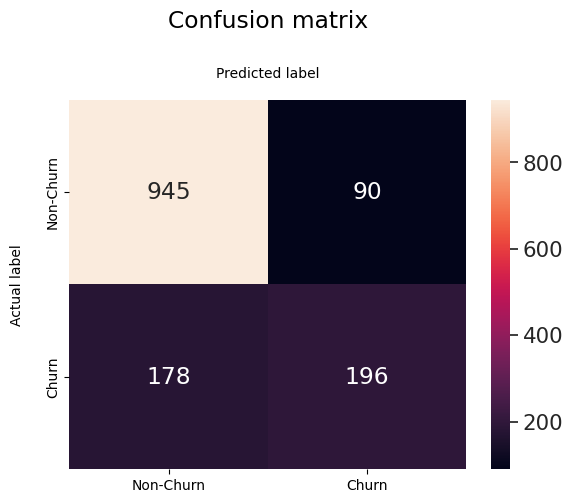

In [ ]:
cm = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cm, index = [i for i in ["Non-Churn","Churn"]],
                  columns = [i for i in ["Non-Churn","Churn"]])
plt.figure(figsize = (28,20))
fig, ax = plt.subplots()
sns.set(font_scale=1.4)
sns.heatmap(df_cm, annot=True, fmt='g'#,cmap="YlGnBu"
           )
plt.title('Confusion matrix\n', y=1.1)
ax.xaxis.set_label_position("top")
plt.ylabel('Actual label\n')
plt.xlabel('Predicted label\n')
